Enter grid dimensions (m n): 14 14
Enter number of obstacles: 23
1 4
2 2
2 7
2 10
3 5
3 12
4 1
4 6
4 11
5 4
5 9
6 8
6 13
7 3
7 10
8 2
8 6
8 12
9 5
10 9
11 1
11 13
12 7
Enter number of terrain cost cells: 8
0 5 5
0 6 6
1 6 7
3 7 4
5 7 11
7 8 4
9 12 1
13 10 5
Enter start coordinates: 0 0
Enter goal coordinates: 13 13
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (6, 6), (6, 7), (7, 7), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (9, 11), (9, 12), (10, 12), (11, 12), (12, 12), (12, 13), (13, 13)]
Total Cost: 26
Runtime: 0.000392 seconds


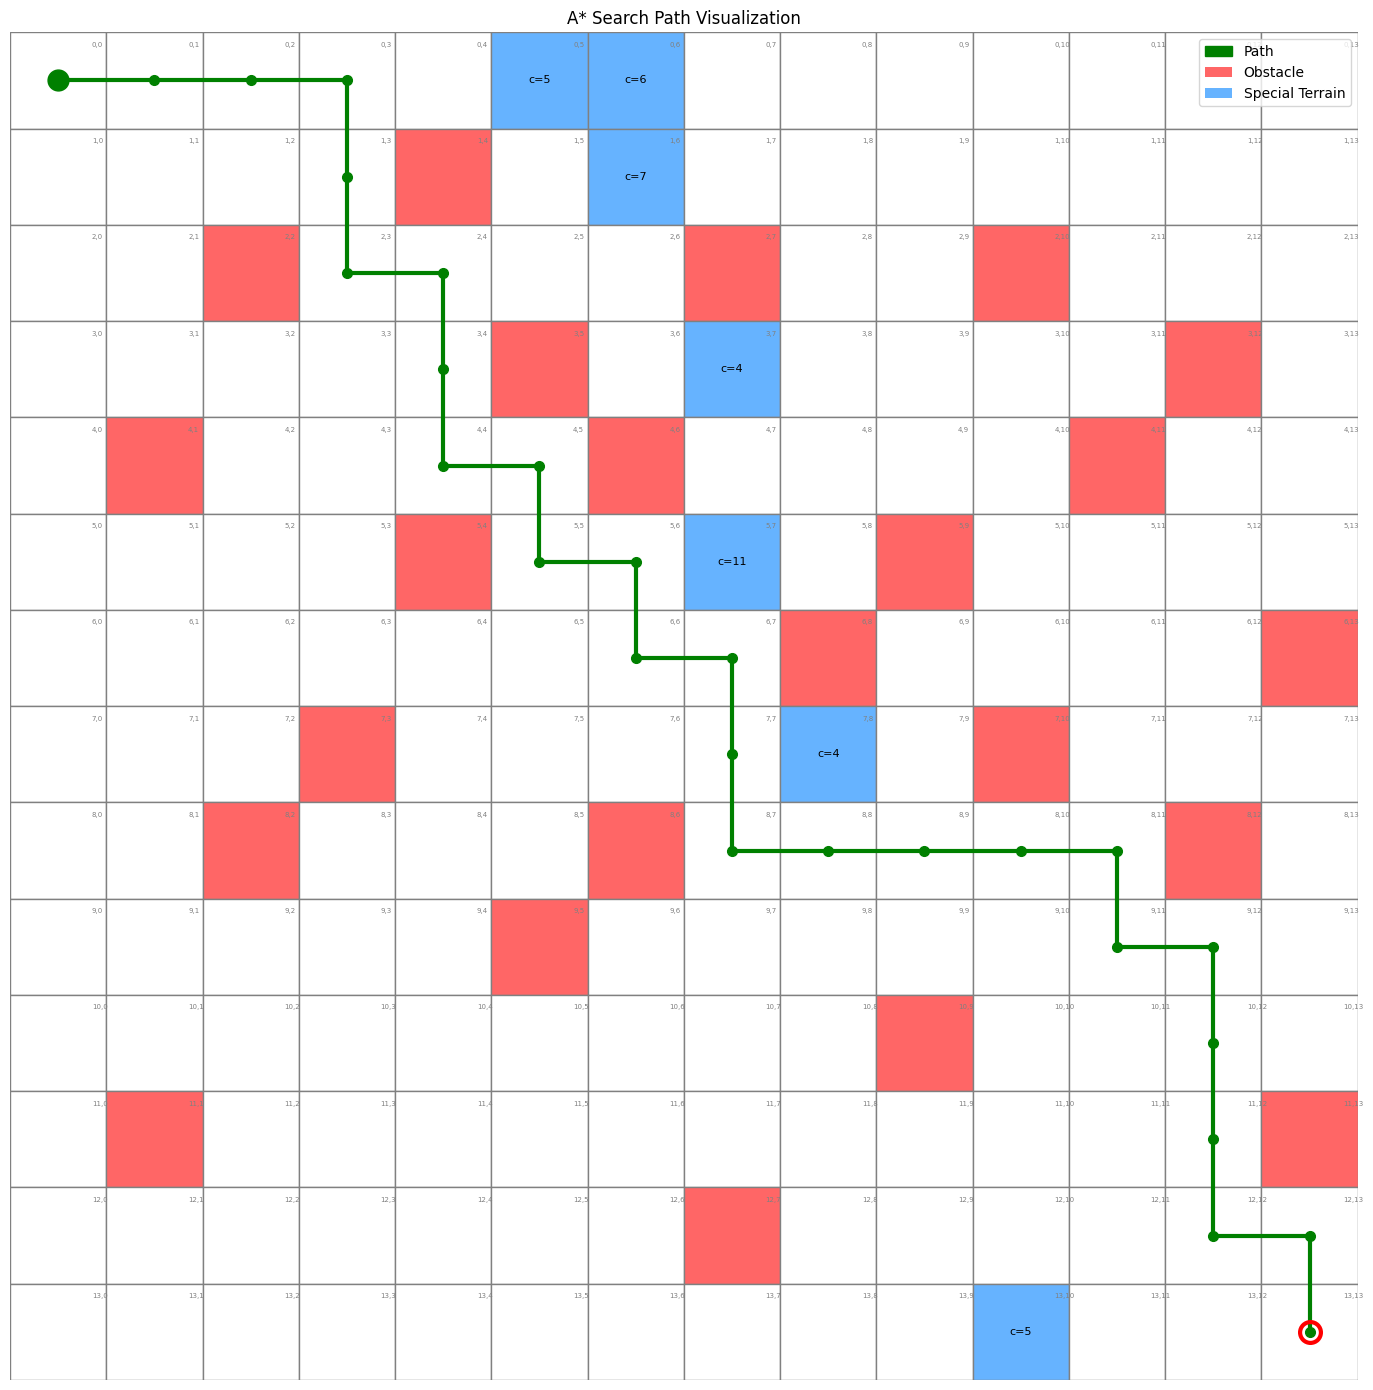

In [ ]:
import heapq
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Heuristic: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* algorithm
def a_star(grid, terrain, start, goal):
    m, n = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < m and 0 <= neighbor[1] < n:
                if grid[neighbor[0]][neighbor[1]] == -1:
                    continue  # Skip obstacles
                tentative_g = g_score[current] + terrain.get(neighbor, 1)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('inf')  # No path found

# Draw fancy grid
def draw_fancy_grid(m, n, grid, terrain, path, start, goal):
    fig, ax = plt.subplots(figsize=(n, m))

    for i in range(m):
        for j in range(n):
            cost = terrain.get((i, j), 1)
            cell = grid[i][j]
            pos = (j, m - i - 1)

            if cell == -1:
                color = '#ff6666'  # Obstacle - red
            elif cost != 1:
                color = '#66b3ff'  # Special terrain - blue
            else:
                color = '#ffffff'  # Normal cell - white

            rect = patches.Rectangle(pos, 1, 1, linewidth=1, edgecolor='gray', facecolor=color)
            ax.add_patch(rect)

            if cost != 1 and cell != -1:
                ax.text(j + 0.5, m - i - 0.5, f'c={cost}', ha='center', va='center', fontsize=8)

            ax.text(j + 0.85, m - i - 0.15, f"{i},{j}", fontsize=5, color='gray')

    # Draw path
    if path:
        path_coords = [(j + 0.5, m - i - 0.5) for i, j in path]
        xs, ys = zip(*path_coords)
        ax.plot(xs, ys, color='green', linewidth=3, marker='o', markersize=7, label='Path')

        # Start/Goal markers
        sx, sy = path_coords[0]
        gx, gy = path_coords[-1]
        ax.plot(sx, sy, 'go', markersize=15)
        ax.plot(gx, gy, 'ro', markersize=15, markerfacecolor='none', markeredgewidth=3)

    # Legend
    legend_elements = [
        patches.Patch(facecolor='green', edgecolor='green', label='Path'),
        patches.Patch(facecolor='#ff6666', label='Obstacle'),
        patches.Patch(facecolor='#66b3ff', label='Special Terrain'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_xticks(range(n))
    ax.set_yticks(range(m))
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("A* Search Path Visualization")
    plt.tight_layout()
    plt.show()

# Main function
def main():
    m, n = map(int, input("Enter grid dimensions (m n): ").split())

    k = int(input("Enter number of obstacles: "))
    obstacles = [tuple(map(int, input().split())) for _ in range(k)]

    c = int(input("Enter number of terrain cost cells: "))
    terrain = {}
    for _ in range(c):
        x, y, cost = map(int, input().split())
        terrain[(x, y)] = cost

    start = tuple(map(int, input("Enter start coordinates: ").split()))
    goal = tuple(map(int, input("Enter goal coordinates: ").split()))

    # Initialize grid
    grid = [[0 for _ in range(n)] for _ in range(m)]
    for x, y in obstacles:
        grid[x][y] = -1

    start_time = time.time()
    path, cost = a_star(grid, terrain, start, goal)
    end_time = time.time()

    if path:
        print("Path:", path)
        print("Total Cost:", round(cost, 2))
        print("Runtime:", round(end_time - start_time, 6), "seconds")
    else:
        print("No path found.")

    draw_fancy_grid(m, n, grid, terrain, path, start, goal)

# Run it
if __name__ == "__main__":
    main()


Enter grid dimensions (m n): 14 14
Enter number of obstacles: 6
3 3
5 5
7 2
9 9
10 4
12 12
Enter number of terrain cost cells: 5
2 2 3
6 6 4
8 1 2
11 11 5
13 5 3
Enter start coordinates: 0 0
Enter goal coordinates: 13 13

Path Found!
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 13), (2, 13), (3, 13), (4, 13), (5, 13), (6, 13), (7, 13), (8, 13), (9, 13), (10, 13), (11, 13), (12, 13), (13, 13)]
Total Cost: 26
Time: 0.000161 seconds


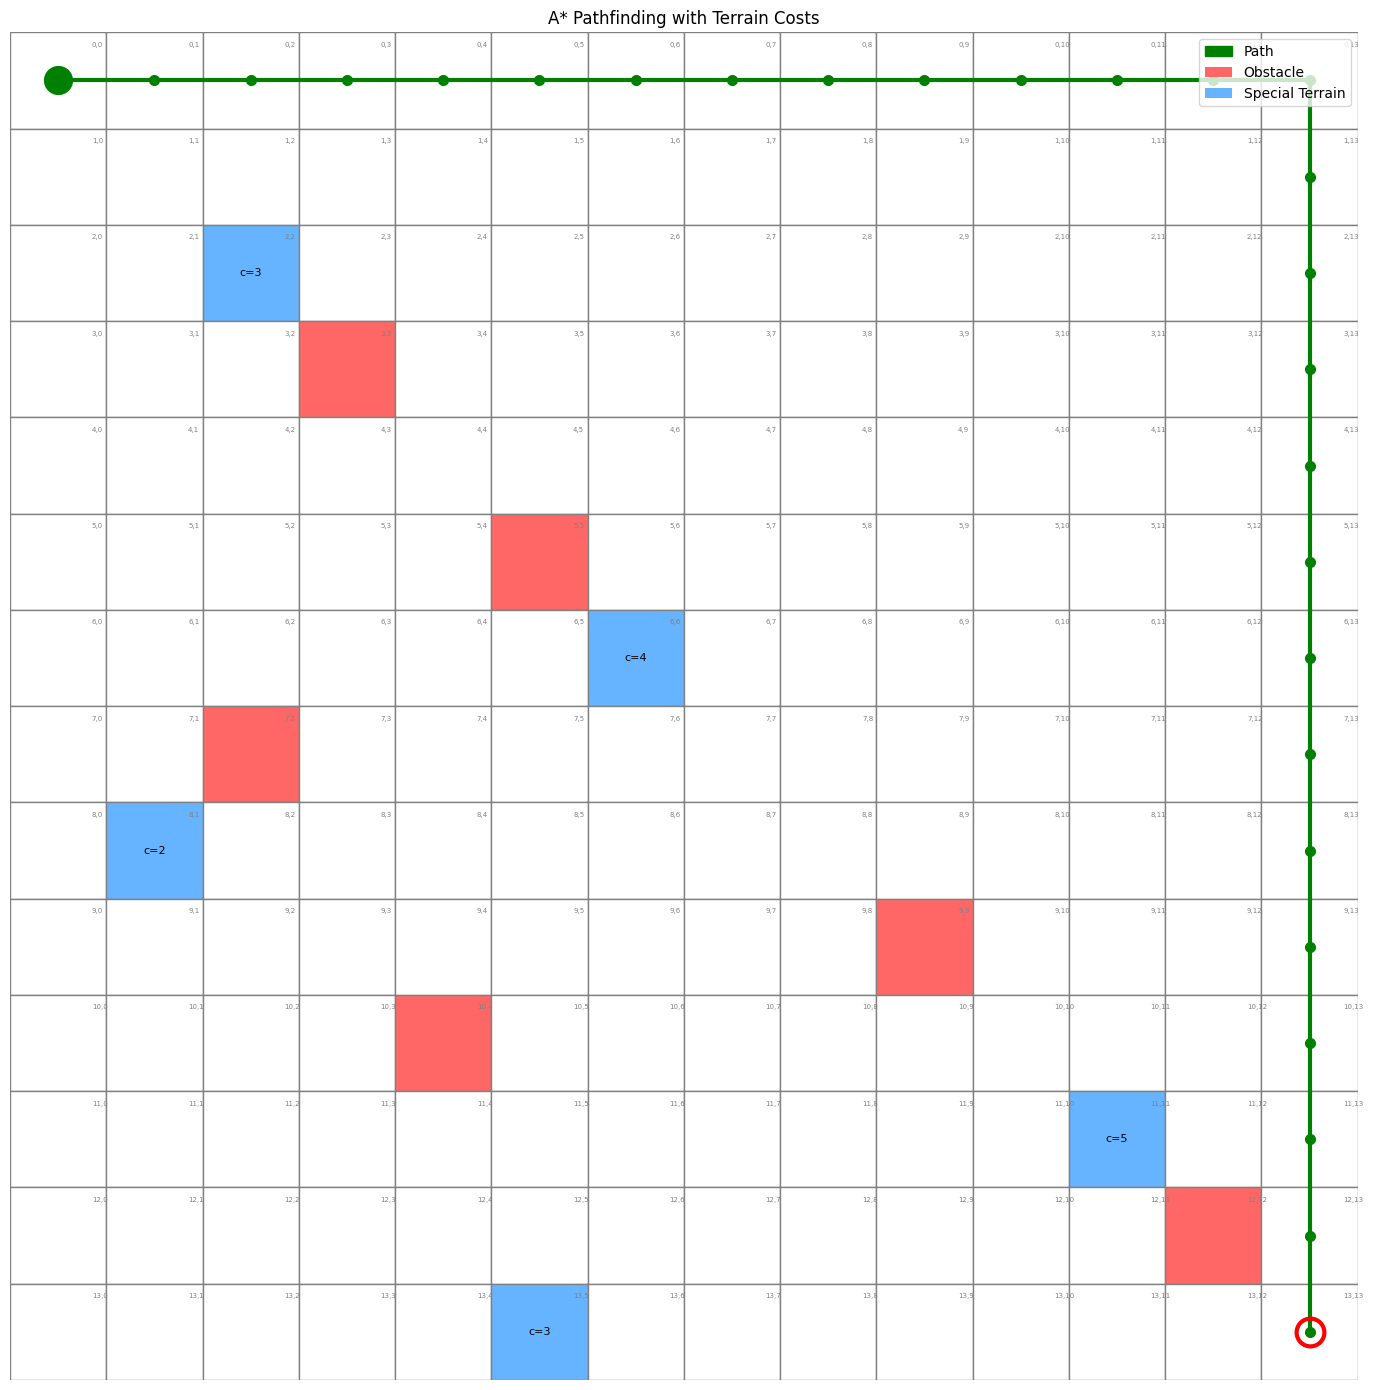

1

In [ ]:
import heapq
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Heuristic: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Search using modified cost function: f(n) = 1.4 * current cell cost + h(n)
def a_star(grid, terrain, start, goal):
    m, n = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: 1.4 * terrain.get(start, 1) + heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < m and 0 <= neighbor[1] < n:
                if grid[neighbor[0]][neighbor[1]] == -1:
                    continue  # Obstacle

                move_cost = terrain.get(neighbor, 1)
                tentative_g = g_score[current] + move_cost

                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = 1.4 * move_cost + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('inf')

# Drawing the grid and path
def draw_fancy_grid(m, n, grid, terrain, path, start, goal):
    fig, ax = plt.subplots(figsize=(n, m))

    for i in range(m):
        for j in range(n):
            cost = terrain.get((i, j), 1)
            cell = grid[i][j]
            pos = (j, m - i - 1)

            if cell == -1:
                color = '#ff6666'  # Obstacle
            elif cost != 1:
                color = '#66b3ff'  # Special Terrain
            else:
                color = '#ffffff'  # Normal

            rect = patches.Rectangle(pos, 1, 1, linewidth=1, edgecolor='gray', facecolor=color)
            ax.add_patch(rect)

            if cost != 1 and cell != -1:
                ax.text(j + 0.5, m - i - 0.5, f'c={cost}', ha='center', va='center', fontsize=8)

            ax.text(j + 0.85, m - i - 0.15, f"{i},{j}", fontsize=5, color='gray')

    # Draw path
    if path:
        path_coords = [(j + 0.5, m - i - 0.5) for i, j in path]
        xs, ys = zip(*path_coords)
        ax.plot(xs, ys, color='green', linewidth=3, marker='o', markersize=7, label='Path')

        sx, sy = path_coords[0]
        gx, gy = path_coords[-1]
        ax.plot(sx, sy, 'go', markersize=20)  # Start
        ax.plot(gx, gy, 'ro', markersize=20, markerfacecolor='none', markeredgewidth=3)  # Goal

    legend_elements = [
        patches.Patch(facecolor='green', edgecolor='green', label='Path'),
        patches.Patch(facecolor='#ff6666', label='Obstacle'),
        patches.Patch(facecolor='#66b3ff', label='Special Terrain'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_xticks(range(n))
    ax.set_yticks(range(m))
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("A* Pathfinding with Terrain Costs")
    plt.tight_layout()
    plt.show()

# Main
def main():
    m, n = map(int, input("Enter grid dimensions (m n): ").split())

    k = int(input("Enter number of obstacles: "))
    obstacles = [tuple(map(int, input().split())) for _ in range(k)]

    c = int(input("Enter number of terrain cost cells: "))
    terrain = {}
    for _ in range(c):
        x, y, cost = map(int, input().split())
        terrain[(x, y)] = cost

    start = tuple(map(int, input("Enter start coordinates: ").split()))
    goal = tuple(map(int, input("Enter goal coordinates: ").split()))

    grid = [[0 for _ in range(n)] for _ in range(m)]
    for x, y in obstacles:
        grid[x][y] = -1

    start_time = time.time()
    path, cost = a_star(grid, terrain, start, goal)
    end_time = time.time()

    if path:
        print("\nPath Found!")
        print("Path:", path)
        print("Total Cost:", round(cost, 2))
        print("Time:", round(end_time - start_time, 6), "seconds")
    else:
        print("No path found.")

    draw_fancy_grid(m, n, grid, terrain, path, start, goal)

# Run the main
if __name__ == "__main__":
    main()
1